In [23]:
## Importing the necessary packages and setting up the notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
import os
import matplotlib as mpl
import sklearn
import seaborn as sns

mpl.rcParams["axes.grid"] = False
%matplotlib inline

In [2]:
dataset_path = Path(os.getcwd()) / "production_data" / "volve_production_data_working.xlsx"

In [3]:
## Installing openpyxl library to read the excel file in pandas
# pip install openpyxl

In [4]:
prod_df = pd.read_excel(dataset_path, parse_dates = [0])

In [5]:
prod_df.head()

DATEPRD  NPD_WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
0 2014-04-07                7405            0.0                0.00000   
1 2014-04-08                7405            0.0                    NaN   
2 2014-04-09                7405            0.0                    NaN   
3 2014-04-10                7405            0.0                    NaN   
4 2014-04-11                7405            0.0              310.37614   

   AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
0                   0.00000        0.00000                0.0   
1                       NaN            NaN                0.0   
2                       NaN            NaN                0.0   
3                       NaN            NaN                0.0   
4                  96.87589      277.27826                0.0   

   AVG_CHOKE_SIZE_P AVG_CHOKE_UOM  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  \
0          0.000000             %    0.00000    0.00000        0.00000   
1          1.003059             %    0.00000    0.00000        0.00000   
2          0.979008             %    0.00000    0.00000        0.00000   
3          0.545759             %    0.00000    0.00000        0.00000   
4          1.215987             %   33.09788   10.47992       33.07195   

   BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL   FLOW_KIND  
0           0.0           0.0           0.0          NaN  production  
1           0.0           0.0           0.0          NaN  production  
2           0.0           0.0           0.0          NaN  production  
3           0.0           0.0           0.0          NaN  production  
4           0.0           0.0           0.0          NaN  production

In [61]:
prod_df.describe()

NPD_WELL_BORE_CODE  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
count         9161.000000    9161.000000            8980.000000   
mean          6034.808645      20.168721             181.803869   
std            824.532027       8.293401             109.712363   
min           5351.000000       0.000000               0.000000   
25%           5351.000000      24.000000               0.000000   
50%           5599.000000      24.000000             232.896939   
75%           7078.000000      24.000000             255.401455   
max           7405.000000      25.000000             397.588550   

       AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
count               8980.000000    8980.000000        7890.000000   
mean                  77.162969     154.028787          14.856100   
std                   45.657948      76.752373           8.406822   
min                    0.000000       0.000000           0.000000   
25%                    0.000000      83.665361          10.841437   
50%                  103.186689     175.588861          16.308598   
75%                  106.276591     204.319964          21.306125   
max                  108.502178     345.906770          30.019828   

       AVG_CHOKE_SIZE_P    AVG_WHP_P    AVG_WHT_P  DP_CHOKE_SIZE  \
count       8919.000000  9155.000000  9146.000000    9155.000000   
mean          55.168533    45.377811    67.728440      19.170492   
std           36.692924    24.752631    27.719028      22.580005   
min            0.000000     0.000000     0.000000       0.000000   
25%           18.952989    31.148062    56.577834       3.356379   
50%           52.096877    37.933620    80.071250       9.566033   
75%           99.924288    57.101268    88.062202      26.967948   
max          100.000000   137.311030    93.509584     125.718570   

       BORE_OIL_VOL   BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL  
count   9161.000000    9161.000000   9161.000000         15.0  
mean    1095.631548  161049.059703   1672.151332          0.0  
std     1323.538151  188136.410434   1706.982853          0.0  
min        0.000000       0.000000   -457.840000          0.0  
25%      190.690000   29430.590000     19.870000          0.0  
50%      557.550000   87749.660000   1097.790000          0.0  
75%     1345.200000  202482.300000   3260.950000          0.0  
max     5901.840000  851131.520000   8019.740000          0.0

In [62]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9161 entries, 0 to 9160
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   9161 non-null   datetime64[ns]
 1   NPD_WELL_BORE_CODE        9161 non-null   int64         
 2   ON_STREAM_HRS             9161 non-null   float64       
 3   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 4   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 5   AVG_DP_TUBING             8980 non-null   float64       
 6   AVG_ANNULUS_PRESS         7890 non-null   float64       
 7   AVG_CHOKE_SIZE_P          8919 non-null   float64       
 8   AVG_CHOKE_UOM             9161 non-null   object        
 9   AVG_WHP_P                 9155 non-null   float64       
 10  AVG_WHT_P                 9146 non-null   float64       
 11  DP_CHOKE_SIZE             9155 non-null   float64       
 12  BORE_OIL_VOL        

In [11]:
prod_df.drop(["AVG_CHOKE_UOM", "FLOW_KIND", "AVG_DP_TUBING", "BORE_WI_VOL", "AVG_ANNULUS_PRESS", 
             "BORE_GAS_VOL", "BORE_WAT_VOL"], axis = 1, inplace = True)

In [12]:
## Function to break the dataset into separate datasets so that each dataset only contains a single well data
## Returns a dictionary with key as well id and values as the corresponding dataset for that well

def wellwise_break(df):
    wells = df.NPD_WELL_BORE_CODE.unique()
    df_wells = {}
    for well in wells:
        df_wells[well] = df[df["NPD_WELL_BORE_CODE"] == well].reset_index(drop = True)
        df_wells[well] = df_wells[well].drop(["NPD_WELL_BORE_CODE"], axis = 1)
    return df_wells

In [13]:
well_df_dict = wellwise_break(prod_df)

In [85]:
list(well_df_dict.keys())

[7405, 7078, 5599, 5769, 7289, 5351]

In [151]:
df_5351 = well_df_dict[5351].copy()

# EDA

In [153]:
df_5351.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   3056 non-null   datetime64[ns]
 1   ON_STREAM_HRS             3056 non-null   float64       
 2   AVG_DOWNHOLE_PRESSURE     3050 non-null   float64       
 3   AVG_DOWNHOLE_TEMPERATURE  3050 non-null   float64       
 4   AVG_CHOKE_SIZE_P          2860 non-null   float64       
 5   AVG_WHP_P                 3056 non-null   float64       
 6   AVG_WHT_P                 3056 non-null   float64       
 7   DP_CHOKE_SIZE             3056 non-null   float64       
 8   BORE_OIL_VOL              3056 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 215.0 KB


AVG_CHOKE_SIZE_P feature has 196 nan values. We'll drop the instances with no choke size values.

AVG_DOWNHOLE_PRESSURE and AVG_DOWNHOLE_TEMPERATURE both have 6 nan values within common instances. This is probably due to some sensor error as the production is non-zero in these instances. We'll also drop these instances.

In [154]:
## Removing Dates on which the well flowed for zero hours from the dataset
df_5351.drop(index = list(df_5351[df_5351.ON_STREAM_HRS == 0].index), axis = 0, inplace = True)

## Removing Dates on which the well produced zero m3 oil from the dataset
df_5351.drop(index = list(df_5351[df_5351.BORE_OIL_VOL == 0].index), axis = 0, inplace = True)

## Removing Instances with null values in CHOKE Size and Downhole Pressure/Temp
df_5351.drop(index = list(df_5351[pd.isna(df_5351.AVG_CHOKE_SIZE_P)].index), axis = 0, inplace = True)
df_5351.drop(index = list(df_5351[pd.isna(df_5351.AVG_DOWNHOLE_PRESSURE)].index), axis = 0, inplace = True)

df_5351.reset_index(drop = True, inplace = True)

In [155]:
df_5351.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   2717 non-null   datetime64[ns]
 1   ON_STREAM_HRS             2717 non-null   float64       
 2   AVG_DOWNHOLE_PRESSURE     2717 non-null   float64       
 3   AVG_DOWNHOLE_TEMPERATURE  2717 non-null   float64       
 4   AVG_CHOKE_SIZE_P          2717 non-null   float64       
 5   AVG_WHP_P                 2717 non-null   float64       
 6   AVG_WHT_P                 2717 non-null   float64       
 7   DP_CHOKE_SIZE             2717 non-null   float64       
 8   BORE_OIL_VOL              2717 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 191.2 KB


In [156]:
df_5351.describe()

ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
count    2717.000000            2717.000000               2717.000000   
mean       23.050687             246.505180                101.647452   
std         3.438220              25.077625                  8.742068   
min         0.625000               0.000000                  0.000000   
25%        24.000000             240.602292                 99.873083   
50%        24.000000             247.191777                101.782098   
75%        24.000000             261.519886                105.141984   
max        25.000000             289.897009                106.772733   

       AVG_CHOKE_SIZE_P    AVG_WHP_P    AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  
count       2717.000000  2717.000000  2717.000000    2717.000000   2717.000000  
mean          72.917002    43.807395    85.825170      13.757965   1443.872091  
std           27.658527    18.125673     5.836733      16.542586   1288.453491  
min            2.485842     0.000000    12.134665       1.450701      4.300000  
25%           44.923847    31.499809    85.357485       2.616243    330.840000  
50%           76.692234    34.951201    87.383659       5.696694   1040.770000  
75%          100.000000    49.828866    88.717042      17.151500   2235.480000  
max          100.000000   115.184383    93.509584      82.983969   5644.370000

In [16]:
# A utility function to save the figures in the "figures" folder inside the working directory

def fig_save(fig, name, path = 'C:\\Users\\spect\\OneDrive\\Desktop\\ML_conda_projects\\spectre_lab\\volve_dataset_project\\figures'):
    fig.savefig(os.path.join(path, name + ".png"), dpi = 1000, bbox_inches = "tight")
    print(os.path.join(path, name + ".png"))

C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_7405.png
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_7078.png
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_5599.png
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_5769.png
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_7289.png
C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\volve_dataset_project\figures\Production profile of Well_5351.png


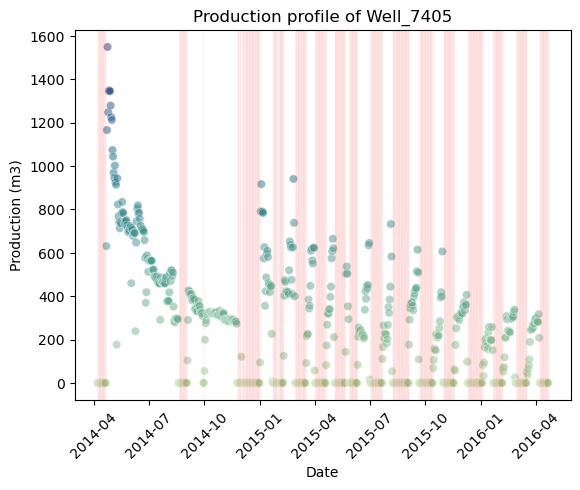

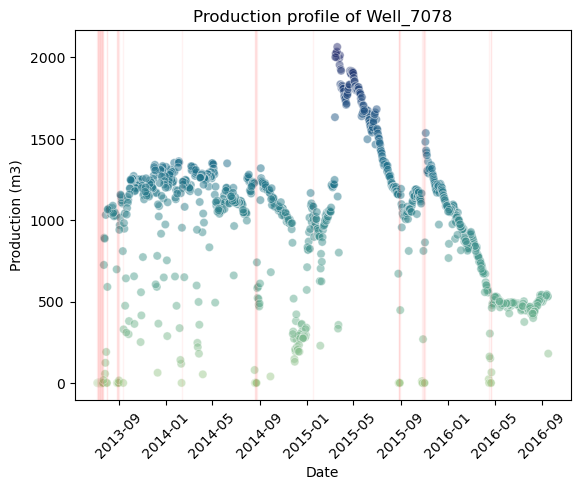

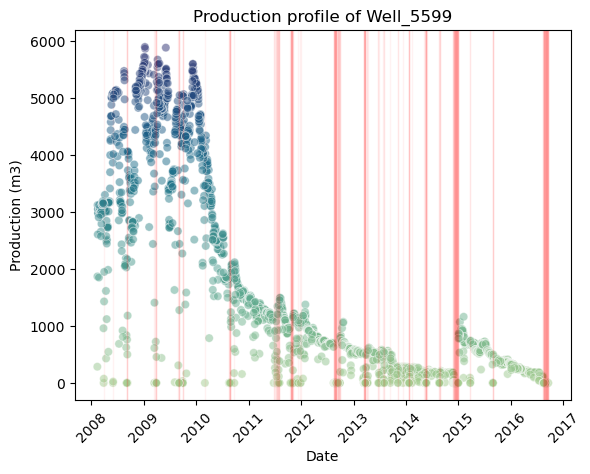

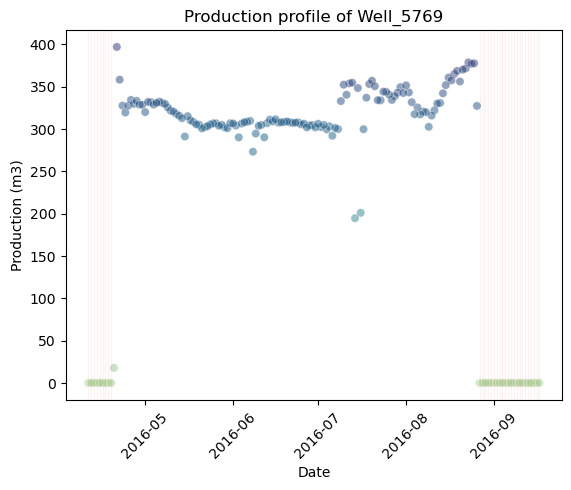

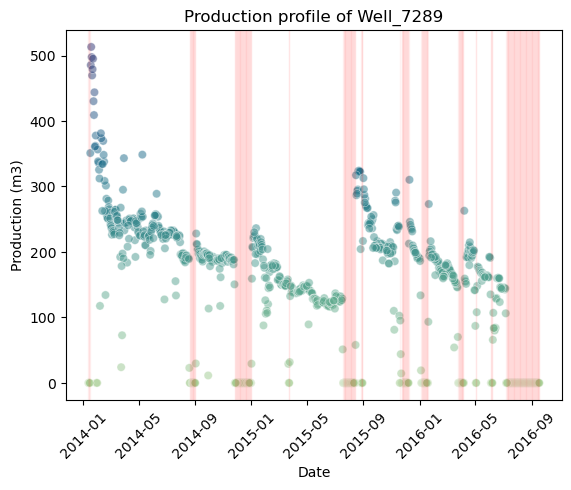

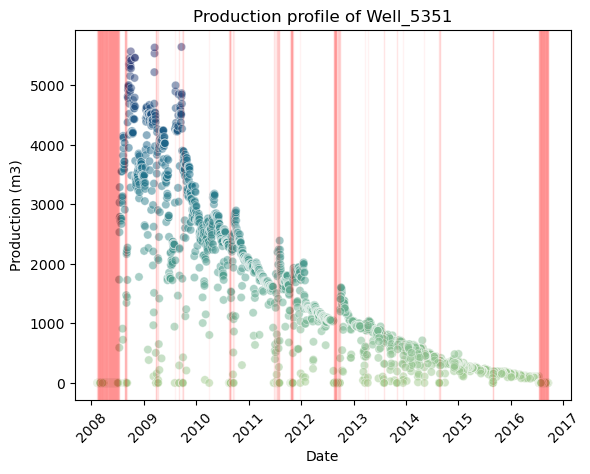

In [57]:
# Visualizing the production profile of all the wells...

for (well, df) in zip(well_df_dict.keys(), well_df_dict.values()):
    df_nf_dates = df[df.ON_STREAM_HRS == 0]["DATEPRD"]
    fig, ax_1 = plt.subplots()
    ax_1 = sns.scatterplot(x = df.DATEPRD, y = df.BORE_OIL_VOL, hue = df.BORE_OIL_VOL, 
                           palette = "crest", alpha = 0.5, legend = False)
    plt.xticks(rotation = 45)
    for date in df_nf_dates:
        ax_1.axvline(date, color = "r" , linewidth = 1, alpha = 0.05)
    ax_1.set(title = f"Production profile of Well_{well}", xlabel = "Date", ylabel = "Production (m3)")
    fig_save(fig, f"Production profile of Well_{well}")

In [460]:
df_5351.head()

DATEPRD  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
0 2013-11-01       24.00000             249.731352                100.243439   
1 2012-09-30       24.00000             215.332843                102.431521   
2 2016-07-13       14.89167             266.388898                100.358734   
3 2016-07-12       24.00000             266.002483                100.345865   
4 2016-06-25       24.00000             269.518669                100.149725   

   AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  
0        100.000000  32.042419  86.074655       2.726535        677.68  
1         99.989307  35.477146  81.056947       4.405488       1238.40  
2         60.589892  28.131667  89.354794       2.536683         68.47  
3        100.000000  27.728579  89.503524       1.938210        113.84  
4         44.810410  30.673141  89.456170       5.148883        102.57

In [461]:
df_5351.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   3056 non-null   datetime64[ns]
 1   ON_STREAM_HRS             3056 non-null   float64       
 2   AVG_DOWNHOLE_PRESSURE     3050 non-null   float64       
 3   AVG_DOWNHOLE_TEMPERATURE  3050 non-null   float64       
 4   AVG_CHOKE_SIZE_P          2860 non-null   float64       
 5   AVG_WHP_P                 3056 non-null   float64       
 6   AVG_WHT_P                 3056 non-null   float64       
 7   DP_CHOKE_SIZE             3056 non-null   float64       
 8   BORE_OIL_VOL              3056 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 215.0 KB


In [74]:
## Getting the dates on which the well 5351 was non-flowing

df_5351_nf_dates = df_5351[df_5351.ON_STREAM_HRS == 0]
df_5351_nf_dates = df_5351_nf_dates.iloc[:,0].values

In [75]:
## Defining a function to plot the Date vs Production chart
def date_vs_prod(df, nf_plot = False):
    fig, ax_1 = plt.subplots()
    sns.scatterplot(data = df, x = "DATEPRD", y = "BORE_OIL_VOL", hue = "BORE_OIL_VOL", alpha = 0.5, size = 5, ax = ax_1,
                   legend = False, palette="crest")
    if nf_plot:
        nf_dates = df[df.ON_STREAM_HRS == 0]
        nf_dates = nf_dates.iloc[:,0].values
        for date in nf_dates:
            ax_1.axvline(date, color = "r" , linewidth = 1, alpha = 0.05)
    return fig

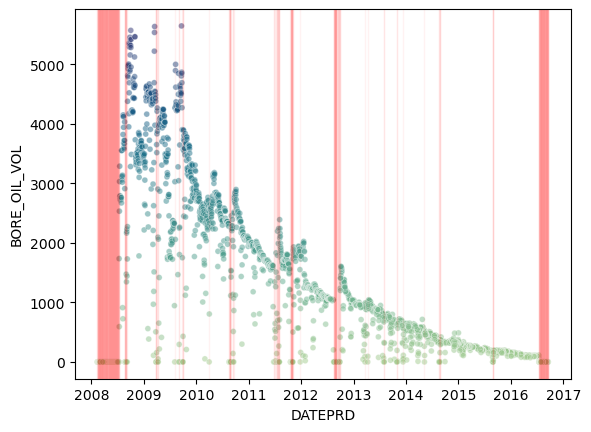

In [76]:
## Testing the above function
plot = date_vs_prod(df_5351, True)

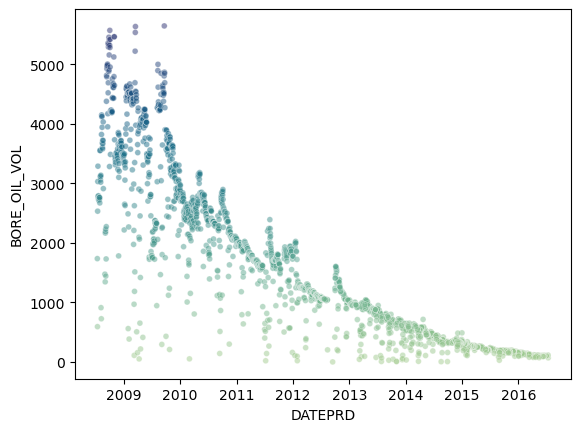

In [77]:
## Removing Dates on which the well flowed for zero hours from the dataset
df_5351.drop(index = list(df_5351[df_5351.ON_STREAM_HRS == 0].index), axis = 0, inplace = True)
df_5351.reset_index(drop = True, inplace = True)
plot = date_vs_prod(df_5351, True)

In [83]:
## Saving the cleaned 5351 well production data to excel file

working_df_path = dataset_path.parent / "working_df.xlsx"
df_5351.to_excel(str(working_df_path), index = False)  ##index = False doesn't save the index

In [84]:
df = pd.read_excel(working_df_path)
df.head()

DATEPRD  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  AVG_DOWNHOLE_TEMPERATURE  \
0 2013-11-01       24.00000             249.731352                100.243439   
1 2012-09-30       24.00000             215.332843                102.431521   
2 2016-07-13       14.89167             266.388898                100.358734   
3 2016-07-12       24.00000             266.002483                100.345865   
4 2016-06-25       24.00000             269.518669                100.149725   

   AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  
0        100.000000  32.042419  86.074655       2.726535        677.68  
1         99.989307  35.477146  81.056947       4.405488       1238.40  
2         60.589892  28.131667  89.354794       2.536683         68.47  
3        100.000000  27.728579  89.503524       1.938210        113.84  
4         44.810410  30.673141  89.456170       5.148883        102.57

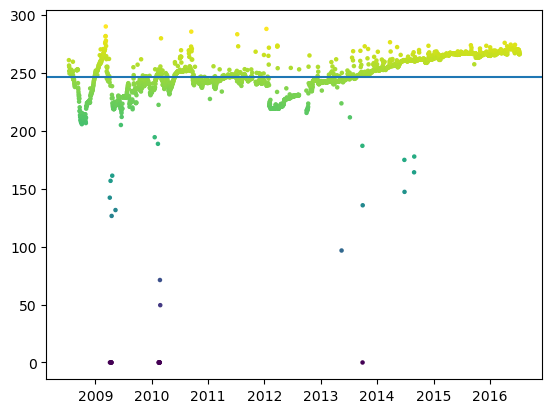

In [244]:
plt.scatter(df_5351.DATEPRD, df_5351.AVG_DOWNHOLE_PRESSURE, c = df_5351.AVG_DOWNHOLE_PRESSURE, s = 5)
plt.axhline(df_5351.AVG_DOWNHOLE_PRESSURE.mean())

In [245]:
df_analysis = df_5351[(df_5351.AVG_DOWNHOLE_PRESSURE.isna()) | (df_5351.AVG_DOWNHOLE_PRESSURE == 0)]

In [246]:
df_analysis

DATEPRD  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
389  2013-09-28       24.00000                    0.0   
1082 2009-01-07       24.00000                    NaN   
1083 2009-01-08       24.00000                    NaN   
1084 2009-01-09       24.00000                    NaN   
1085 2009-01-10       24.00000                    NaN   
1086 2009-01-11       24.00000                    NaN   
1087 2009-01-12       24.00000                    NaN   
1166 2009-04-05       22.19167                    0.0   
1169 2009-04-10        0.80833                    0.0   
1170 2009-04-12       13.85833                    0.0   
1171 2009-04-13       24.00000                    0.0   
1172 2009-04-14       24.00000                    0.0   
1173 2009-04-15        4.47500                    0.0   
1469 2010-02-15       13.70000                    0.0   
1470 2010-02-16       24.00000                    0.0   
1471 2010-02-17       24.00000                    0.0   
1472 2010-02-18       21.60000                    0.0   
1473 2010-02-19       24.00000                    0.0   
1474 2010-02-20       24.00000                    0.0   
1475 2010-02-21       24.00000                    0.0   
1476 2010-02-22       24.00000                    0.0   

      AVG_DOWNHOLE_TEMPERATURE  AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  \
389                        0.0         99.227820  32.239460  87.800628   
1082                       NaN         32.370997  93.353865  75.487206   
1083                       NaN         30.450363  95.857762  74.082995   
1084                       NaN         28.121133  98.476732  72.646676   
1085                       NaN         31.519896  95.670009  74.346879   
1086                       NaN         32.304917  94.564574  73.111061   
1087                       NaN         34.303421  92.040475  76.579049   
1166                       0.0         36.068174  81.858642  78.890274   
1169                       0.0         21.542910  86.930548  73.891809   
1170                       0.0         34.449326  79.385957  71.228733   
1171                       0.0         36.929849  77.487499  78.890691   
1172                       0.0         37.222699  76.398335  79.570445   
1173                       0.0         34.275813  76.653536  79.604041   
1469                       0.0         28.839026  69.259063  74.335526   
1470                       0.0         41.811064  59.768697  86.366964   
1471                       0.0         41.785463  59.812914  85.402790   
1472                       0.0         39.018513  61.798073  84.573984   
1473                       0.0         41.378970  60.528811  88.952072   
1474                       0.0         40.981887  61.036686  89.615584   
1475                       0.0         40.096205  61.195859  89.734128   
1476                       0.0         40.834275  61.639139  89.870976   

      DP_CHOKE_SIZE  BORE_OIL_VOL  
389        3.034070        799.20  
1082      60.698254       3309.88  
1083      63.580540       3054.02  
1084      66.200793       2627.22  
1085      63.246754       3259.45  
1086      62.013093       3360.25  
1087      59.103547       3622.10  
1166      49.167966       3873.72  
1169      54.352218         50.65  
1170      47.091022       2063.32  
1171      44.836729       3941.13  
1172      43.701661       3975.77  
1173      44.062157        651.67  
1469      38.152587       1006.27  
1470      27.405322       2652.06  
1471      27.459889       2606.40  
1472      29.239745       2141.69  
1473      28.172633       2560.92  
1474      28.707857       2519.31  
1475      28.837432       2492.65  
1476      29.283585       2485.03

From the above table, we can see that the data points where the Downhole pressure is zero/NA are the same where the Downhole temperature is zero/NA. This might indicate that the downhole pressure and temperature are conveyed using the same downhole sensor.

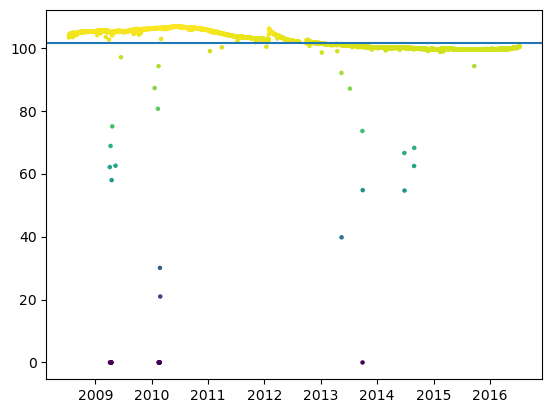

In [247]:
plt.scatter(df_5351.DATEPRD, df_5351.AVG_DOWNHOLE_TEMPERATURE, c = df_5351.AVG_DOWNHOLE_TEMPERATURE, s = 5)
plt.axhline(df_5351.AVG_DOWNHOLE_TEMPERATURE.mean())

From the plots of Average downhole Pressure and Average downhole temperature, we can conclude that we can replace the zero/NA values by the average values.

In [248]:
## Replacing the zero/na values in downhole pressure and temperature with the mean values

df_5351.reset_index(drop = True, inplace = True)

dhp_index = df_5351[(df_5351.AVG_DOWNHOLE_PRESSURE.isna()) | (df_5351.AVG_DOWNHOLE_PRESSURE == 0)].index
dht_index = df_5351[(df_5351.AVG_DOWNHOLE_TEMPERATURE.isna()) | (df_5351.AVG_DOWNHOLE_PRESSURE == 0)].index

for index in dhp_index:
    df_5351.loc[index, "AVG_DOWNHOLE_PRESSURE"] = df_5351["AVG_DOWNHOLE_PRESSURE"].mean()
    
for index in dht_index:
    df_5351.loc[index, "AVG_DOWNHOLE_TEMPERATURE"] = df_5351["AVG_DOWNHOLE_TEMPERATURE"].mean()

In [249]:
df_5351[df_5351.ON_STREAM_HRS > 24]

DATEPRD  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
487  2013-10-27       24.30833             250.212893   
582  2014-10-26       25.00000             261.602755   
1009 2008-10-26       25.00000             214.027703   
1356 2009-10-25       24.50000             241.828108   
1707 2010-10-31       25.00000             242.748362   

      AVG_DOWNHOLE_TEMPERATURE  AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  \
487                 100.271465         95.810951  32.073838  87.112258   
582                  99.645467        100.000000  31.000544  85.646127   
1009                105.109841         43.486955  64.512391  78.139393   
1356                105.788536         39.832136  68.433502  81.802541   
1707                106.136905         64.179190  44.770575  90.931452   

      DP_CHOKE_SIZE  BORE_OIL_VOL  
487        2.800203        675.02  
582        2.290826        344.97  
1009      31.849241       4608.81  
1356      35.187547       3384.02  
1707      12.414894       2497.07

In [250]:
## Some data points have ON_STREAM_HRS > 24...setting them to 24

for index in df_5351[df_5351.ON_STREAM_HRS > 24].index:
    df_5351.loc[index, "ON_STREAM_HRS"] = 24
#     print(index)

In [251]:
## Sorting the values in ascending order wrt the date column

df_5351 = df_5351.sort_values(["DATEPRD"])
df_5351.reset_index(inplace = True, drop = True)

In [252]:
# Breaking the DATEPRD column into Day, Month and Year columns
df_5351["Day"] = df_5351.DATEPRD.dt.day
df_5351["Month"] = df_5351.DATEPRD.dt.month
df_5351["Year"] = df_5351.DATEPRD.dt.year

Now our data looks ready for EDA :{)

Separating the training dataset...to perform EDA and train the model.

In [253]:
#Training dataset is taken to be all the data points before after April 2013 and before June 2015.
# Validation and testing dataset is taken to be all the data points after June 2015

df_5351_train = df_5351[(df_5351.DATEPRD >= pd.to_datetime("04/01/2013")) & (df_5351.DATEPRD < pd.to_datetime("06/01/2015"))]
df_5351_val_test = df_5351[df_5351.DATEPRD >= pd.to_datetime("06/01/2015")]

## Exploring the Data

array([[<AxesSubplot: title={'center': 'DATEPRD'}>,
        <AxesSubplot: title={'center': 'ON_STREAM_HRS'}>,
        <AxesSubplot: title={'center': 'AVG_DOWNHOLE_PRESSURE'}>],
       [<AxesSubplot: title={'center': 'AVG_DOWNHOLE_TEMPERATURE'}>,
        <AxesSubplot: title={'center': 'AVG_CHOKE_SIZE_P'}>,
        <AxesSubplot: title={'center': 'AVG_WHP_P'}>],
       [<AxesSubplot: title={'center': 'AVG_WHT_P'}>,
        <AxesSubplot: title={'center': 'DP_CHOKE_SIZE'}>,
        <AxesSubplot: title={'center': 'BORE_OIL_VOL'}>],
       [<AxesSubplot: title={'center': 'Day'}>,
        <AxesSubplot: title={'center': 'Month'}>,
        <AxesSubplot: title={'center': 'Year'}>]], dtype=object)

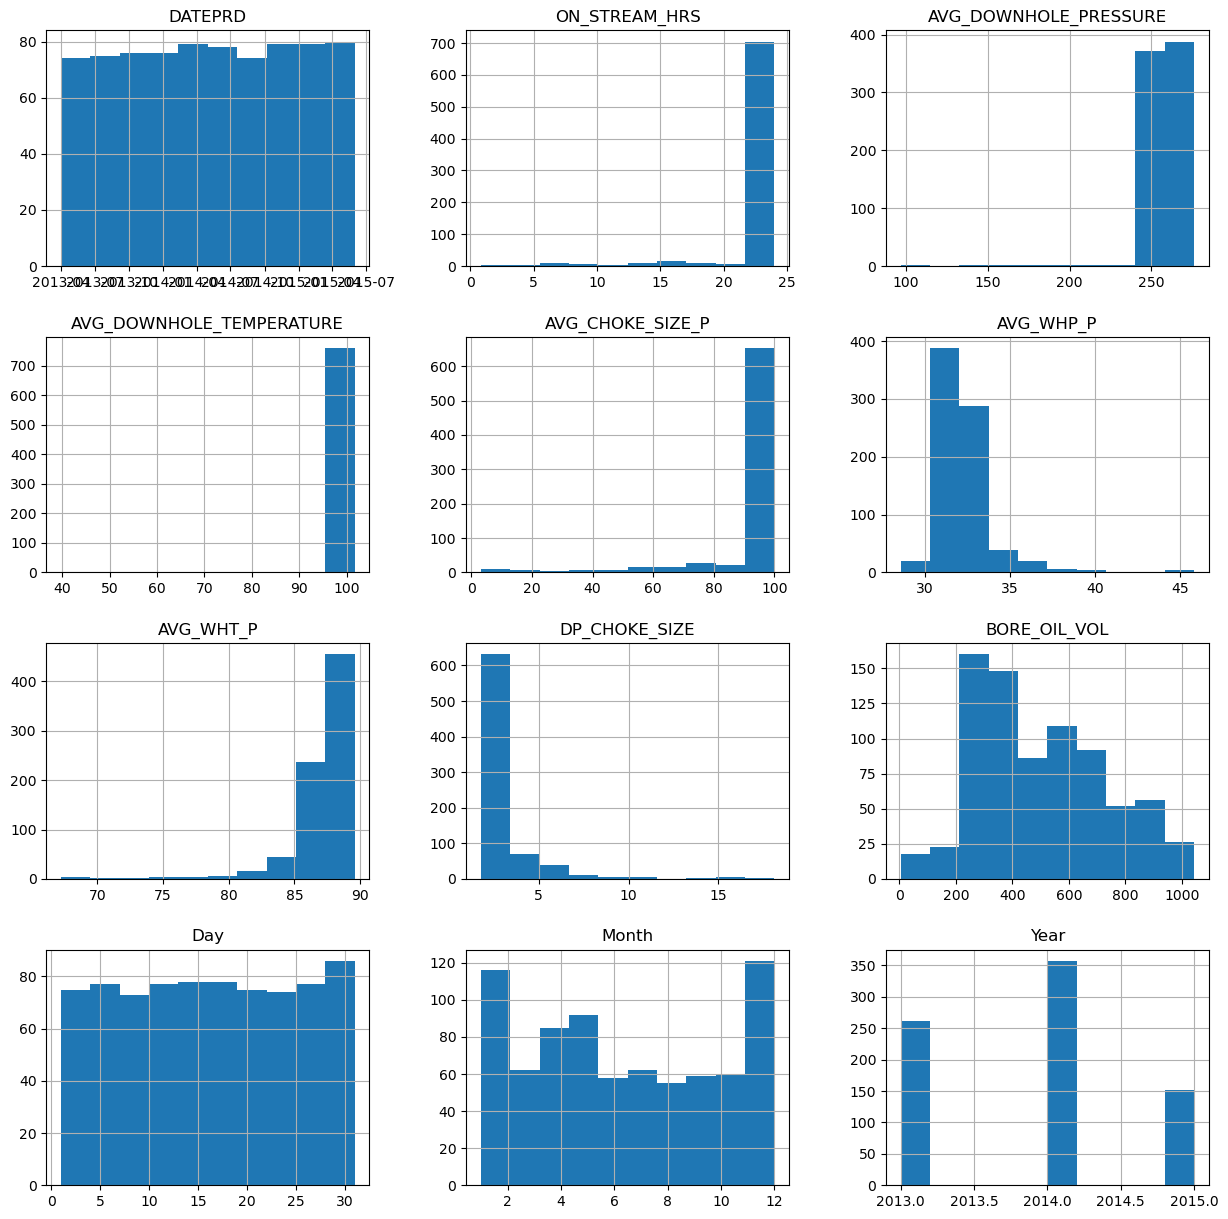

In [254]:
## Visualizing the ditribution of the features in the dataset

df_5351_train.hist(figsize = (15,15))

In [255]:
## Visualizing the outliers using BoxPlots
def boxplot_creator(df):
    f_list = ['ON_STREAM_HRS',  'AVG_DOWNHOLE_PRESSURE',  'AVG_DOWNHOLE_TEMPERATURE', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P',
              'AVG_WHT_P', 'DP_CHOKE_SIZE']
    n_features = len(f_list)
    n_cols = 3
    n_rows = int(np.ceil(n_features/n_cols))
    fig, ax = plt.subplots(n_rows, n_cols, figsize = (15, 5*n_rows))
    count = 0
    for m in range(n_rows):
        for n in range(n_cols):
            if count >= n_features:
                break
            else:
                ax[m,n].boxplot(df[f_list[count]])
                ax[m,n].set_title(f"Boxplot: {f_list[count]}")
                count+=1

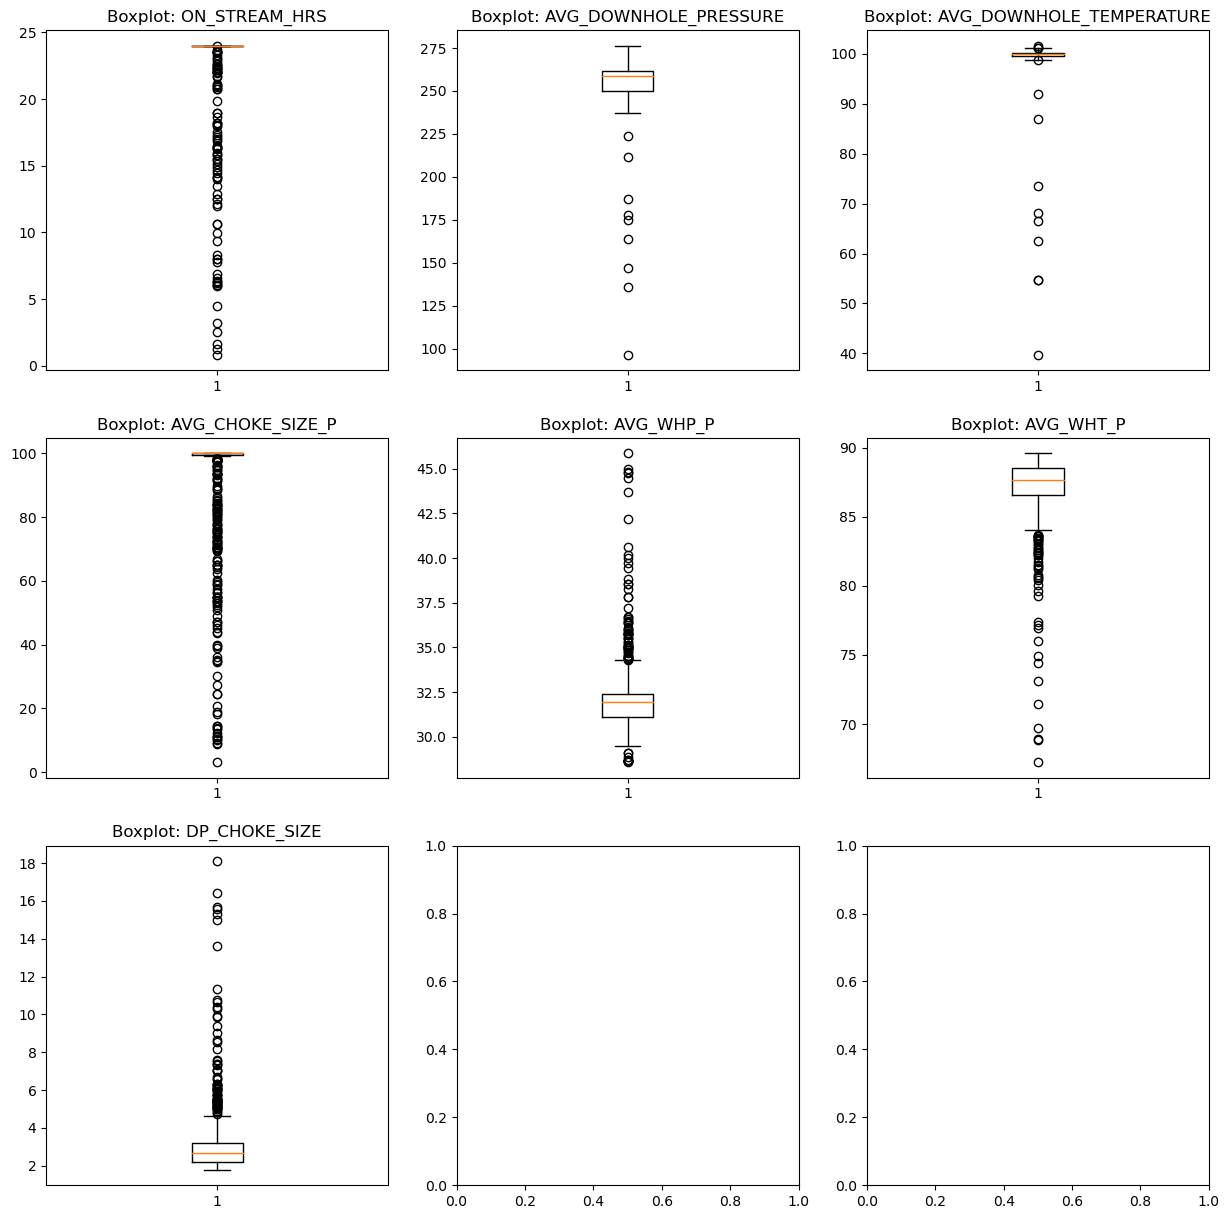

In [256]:
boxplot_creator(df_5351_train)

In [257]:
df_5351_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 1548 to 2317
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   770 non-null    datetime64[ns]
 1   ON_STREAM_HRS             770 non-null    float64       
 2   AVG_DOWNHOLE_PRESSURE     770 non-null    float64       
 3   AVG_DOWNHOLE_TEMPERATURE  770 non-null    float64       
 4   AVG_CHOKE_SIZE_P          770 non-null    float64       
 5   AVG_WHP_P                 770 non-null    float64       
 6   AVG_WHT_P                 770 non-null    float64       
 7   DP_CHOKE_SIZE             770 non-null    float64       
 8   BORE_OIL_VOL              770 non-null    float64       
 9   Day                       770 non-null    int64         
 10  Month                     770 non-null    int64         
 11  Year                      770 non-null    int64         
dtypes: datetime64[ns](

In [258]:
## Removing outliers from the features
df_5351_train_outliers = df_5351_train[
    (df_5351_train.AVG_DOWNHOLE_PRESSURE > 200) &
    (df_5351_train.AVG_DOWNHOLE_TEMPERATURE > 90) &
    (df_5351_train.AVG_WHP_P != 0) &
    (df_5351_train.AVG_WHP_P < 80) &
    (df_5351_train.AVG_WHT_P > 70) &
    (df_5351_train.DP_CHOKE_SIZE < 70)
]
df_5351_train = df_5351_train_outliers.copy()

In [267]:
# pip install seaborn

C:\Users\spect\AppData\Local\Temp\ipykernel_19156\716534681.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_5351.corr()


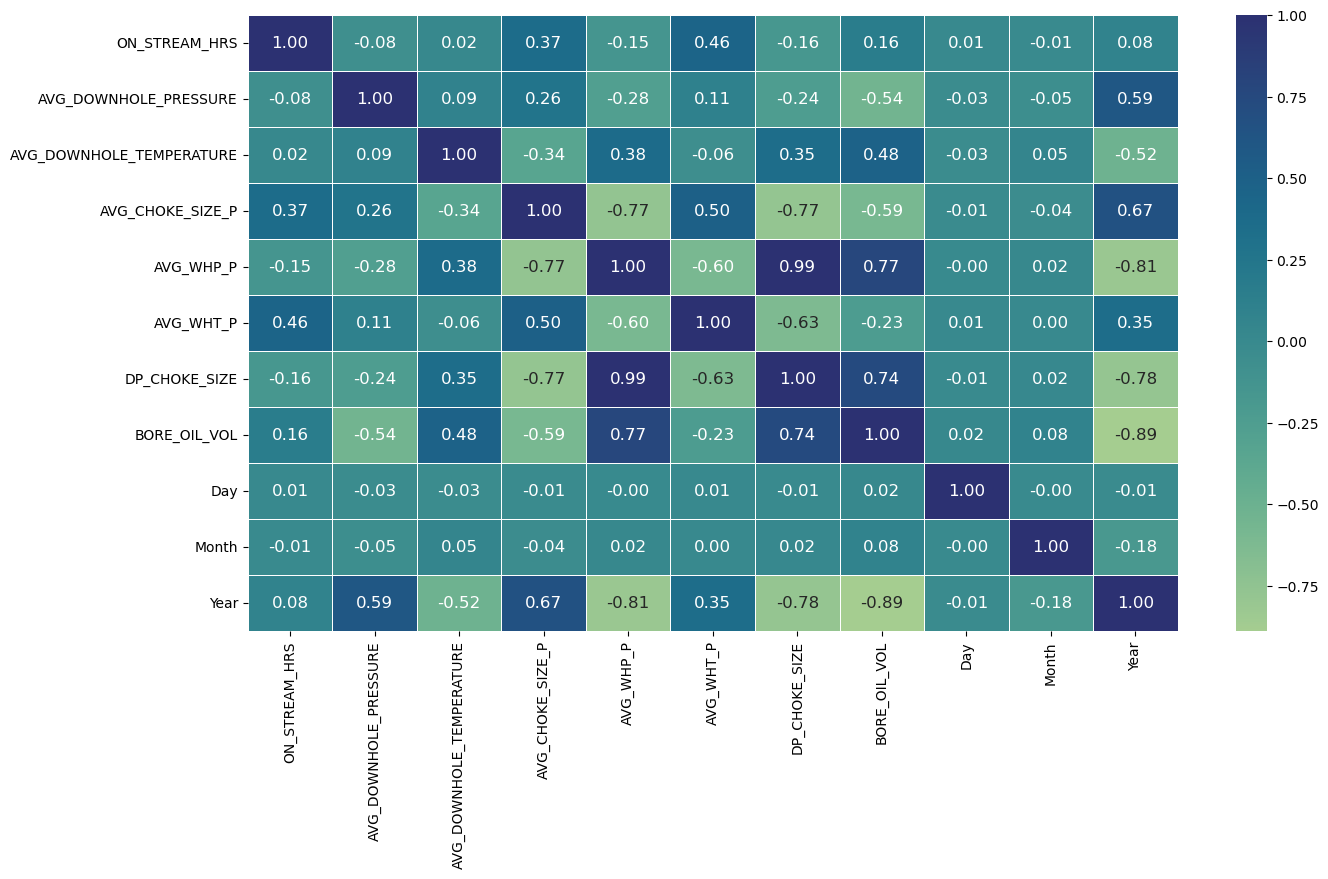

In [266]:
import seaborn as sns
corr_matrix = df_5351.corr()
fig = plt.figure(figsize = (15,8))
ax = sns.heatmap(corr_matrix, annot = True, cmap = "crest", linewidth = 0.5, 
            annot_kws = {"fontsize": 12}, fmt=".2f")

### Preparing a function to apply all the pre-processing steps in a single go

In [14]:
def preprocessor(df_, train_start_date, val_date, test_date, 
                 Day_col = True, Month_col = True, Year_col = True, scale = True):
    
    # Creating a copy of the passed dataset so that the original dataset is not modified
    df = df_.copy()
    
    ## Removing Dates on which the well flowed for zero hours from the dataset
    df.drop(index = list(df[df.ON_STREAM_HRS == 0].index), axis = 0, inplace = True)
    df.reset_index(drop = True, inplace = True)
    
    ## Dropping the date points where the oil volume produced is equal to zero
    df.drop(index = list(df[df.BORE_OIL_VOL == 0].index), axis = 0, inplace = True)
    df.reset_index(drop = True, inplace = True)
    
    ## Some data points have ON_STREAM_HRS > 24...setting them to 24
    for index in df[df.ON_STREAM_HRS > 24].index:
        df.loc[index, "ON_STREAM_HRS"] = 24
    
    # Breaking the DATEPRD column into Day, Month and Year columns
    if Day_col:
        df["Day"] = df.DATEPRD.dt.day
    if Month_col:
        df["Month"] = df.DATEPRD.dt.month
    if Year_col:
        df["Year"] = df.DATEPRD.dt.year
        

    # Training dataset is taken to be all the data points after train_start_date and before val_date
    # Validation and testing dataset is taken to be all the data points after val_date
    df_train = df[(df.DATEPRD >= pd.to_datetime(train_start_date)) & (df.DATEPRD < pd.to_datetime(val_date))].copy()
    df_val_test = df[df.DATEPRD >= pd.to_datetime(val_date)].copy()
    
    ##_______ TO BE DONE AFTER SEPERATING TRAIN DATASET _________
    
    ## Replacing the zero/na values in downhole pressure and temperature with the mean values
    dhp_mean = df_train["AVG_DOWNHOLE_PRESSURE"].mean()
    dht_mean = df_train["AVG_DOWNHOLE_TEMPERATURE"].mean()

    for df_ in [df_train, df_val_test]:
        dhp_index = df_[(df_.AVG_DOWNHOLE_PRESSURE.isna()) | (df_.AVG_DOWNHOLE_PRESSURE == 0)].index
        dht_index = df_[(df_.AVG_DOWNHOLE_TEMPERATURE.isna()) | (df_.AVG_DOWNHOLE_PRESSURE == 0)].index

        for index in dhp_index:
            df_.loc[index, "AVG_DOWNHOLE_PRESSURE"] = dhp_mean

        for index in dht_index:
            df_.loc[index, "AVG_DOWNHOLE_TEMPERATURE"] = dht_mean
    
    ## Removing outliers from the features in the training datset
    df_train = df_train[
        (df_train.AVG_DOWNHOLE_PRESSURE > 200) &
        (df_train.AVG_DOWNHOLE_TEMPERATURE > 90) &
        (df_train.AVG_WHP_P != 0) &
        (df_train.AVG_WHP_P < 80) &
        (df_train.AVG_WHT_P > 70) &
        (df_train.DP_CHOKE_SIZE < 70)
    ]
    
    # Creating X_train, y_train, X_val, y_val, X_test, y_test
    # Validation data is taken to be data points from val_date till test_date
    # Test data is taken to be data points from test_date till the last available date
    features_list = list(df_train.columns)
    features_list.remove("BORE_OIL_VOL")

    y_train = df_train["BORE_OIL_VOL"]
    X_train = df_train.loc[:,features_list]

    df_val = df_val_test[df_val_test.DATEPRD < pd.to_datetime(test_date)]
    df_test = df_val_test[df_val_test.DATEPRD >= pd.to_datetime(test_date)]

    y_val = df_val["BORE_OIL_VOL"]
    X_val = df_val.loc[:,features_list]

    y_test = df_test["BORE_OIL_VOL"]
    X_test = df_test.loc[:,features_list]
    
    # Dropping DATEPROD col
    for df_ in [X_train, X_val, X_test]:
        df_.drop(["DATEPRD"], axis = 1, inplace = True)
    
    print(f" Features in the output datasets: {list(X_train.columns)}")
    
    # Scaling the data using StandardScaler from sklearn
    if scale:
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)
    
    # Printing the length of X_train, X_val and X_test datasets
    for X_name, X_df in zip(["Train", "Validation", "Test"], [X_train, X_val, X_test]):
        print(f"Data points in {X_name} are: {len(X_df)}")
    
    return (X_train, y_train, X_val, y_val, X_test, y_test)

## Testing the above preprocessing function 

# (X_train, y_train, X_val, y_val, X_test, y_test) = preprocessor(df_5351, train_start_date="04/01/2013",
#                                                              val_date = "06/01/2015", test_date = "01/01/2016")

In [15]:
## Function for plotting predicted values vs actual values

def predict_plot(actual, predicted, fig_title = ""):
    """
    predict_plot(actual_values, predicted_values)
    """
    import matplotlib as mpl
    cmap = mpl.cm.get_cmap("plasma")
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.scatter(actual, predicted, alpha = 0.2 , c = cmap((np.abs(actual)-np.abs(predicted))/np.abs(actual)))
    ax.set_xlabel("Actual values")
    ax.set_ylabel("Predicted values")
    ax.plot(np.linspace(actual.min(), actual.max(), 100), np.linspace(actual.min(), actual.max(), 100), "r--")
    ax.set_title(fig_title)
    sm = mpl.cm.ScalarMappable(cmap = cmap)
    cbar = plt.colorbar(sm)
    cbar.set_label('Error in predictions scaled to [0,1]', rotation=270)
    cbar.ax.set_yticklabels(['0','','','',"",'1'])
    plt.show()

### Preparing the data and trying non-time series models (linear, SVM, ensembles, NN)

In [80]:
(X_train, y_train, X_val, y_val, X_test, y_test) = preprocessor(df_5351, train_start_date="04/01/2013",
                                                             val_date = "06/01/2015", test_date = "01/01/2016",
                                                               Day_col = False, Month_col = False, Year_col = False)

 Features in the output datasets: ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE']
Data points in Train are: 758
Data points in Validation are: 210
Data points in Test are: 195


## 1. Trying Random Forest Model

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

In [340]:
mean_squared_error(rf.predict(X_val), y_val)

2814.216168410607

In [341]:
mean_squared_error(y_train, rf.predict(X_train))

2562.406833533967

Such a significant difference in the mean squared error between training predictions and validation predictions signifies that the Random Forest model is overfitting

C:\Users\spect\AppData\Local\Temp\ipykernel_19156\2714923767.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_19156\2714923767.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


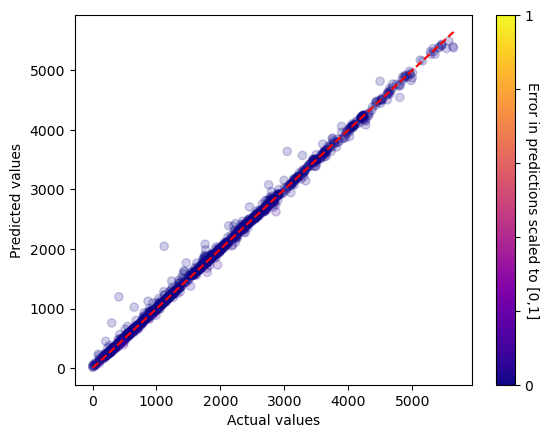

In [342]:
predict_plot(y_train, rf.predict(X_train))

C:\Users\spect\AppData\Local\Temp\ipykernel_19156\2714923767.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_19156\2714923767.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


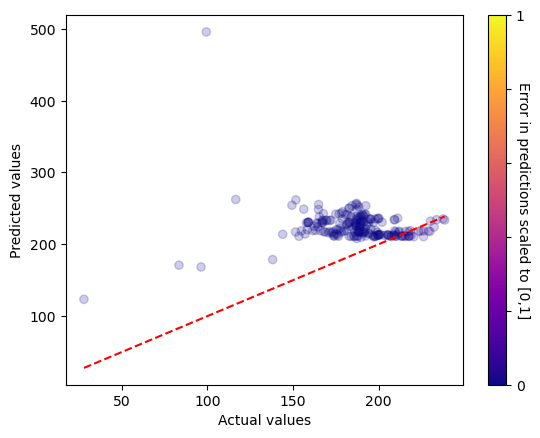

In [343]:
predict_plot(y_val, rf.predict(X_val))

(array([ 1.,  0.,  1.,  2.,  1.,  6., 40., 96., 45., 18.]),
 array([ 27.78 ,  48.867,  69.954,  91.041, 112.128, 133.215, 154.302,
        175.389, 196.476, 217.563, 238.65 ]),
 <BarContainer object of 10 artists>)

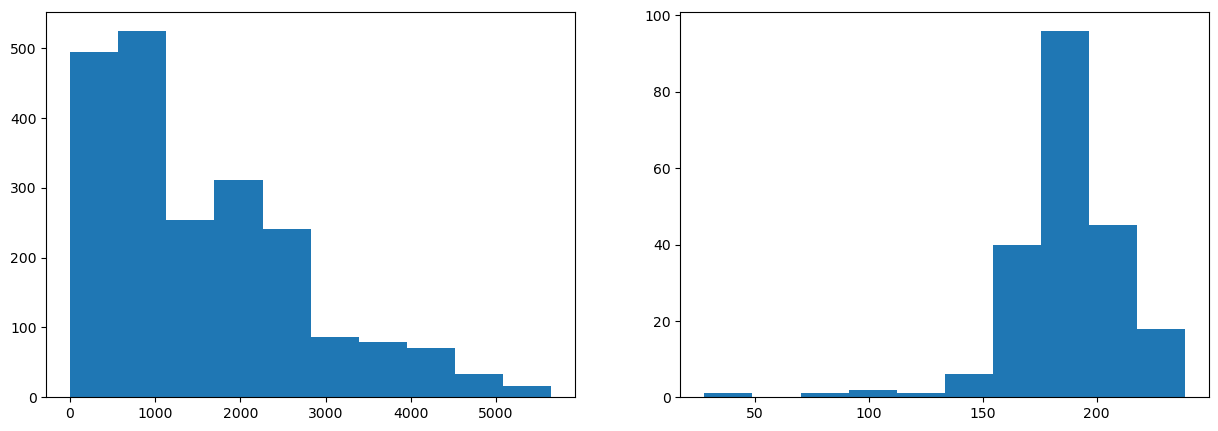

In [344]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].hist(y_train)
ax[1].hist(y_val)

Feature importance in the Random Forest Model

<AxesSubplot: >

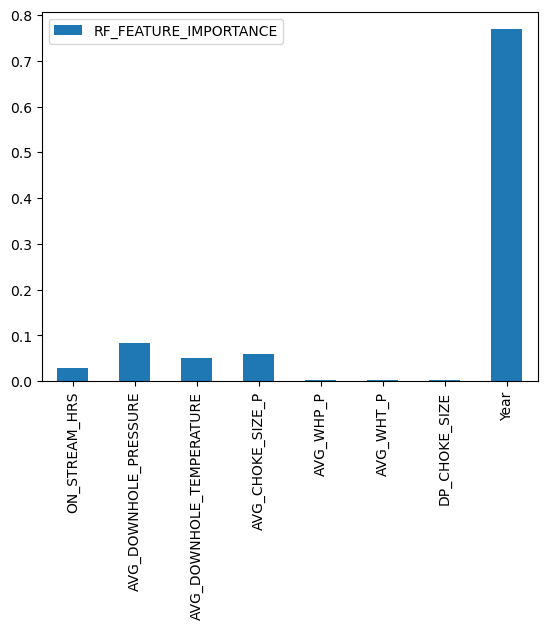

In [346]:
rf_fi = rf.feature_importances_
features = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'Year']
df_fi = pd.DataFrame(data = rf_fi, index = features, columns=["RF_FEATURE_IMPORTANCE"])
df_fi.plot.bar()

## 2. Trying SVM

### 2.1 SVM RBF Kernel

In [347]:
from sklearn.svm import SVR
svr = SVR(C = 10^6, epsilon = 6)
svr.fit(X_train, y_train)

SVR(C=12, epsilon=6)

In [348]:
mean_squared_error(y_val, svr.predict(X_val))

19645.95421579414

In [349]:
mean_squared_error(y_train, svr.predict(X_train))

243257.80575753644

C:\Users\spect\AppData\Local\Temp\ipykernel_19156\2714923767.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_19156\2714923767.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


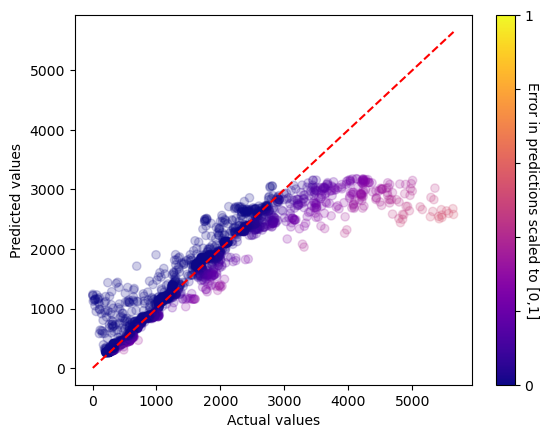

In [350]:
predict_plot(y_train, svr.predict(X_train))

C:\Users\spect\AppData\Local\Temp\ipykernel_19156\2714923767.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_19156\2714923767.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


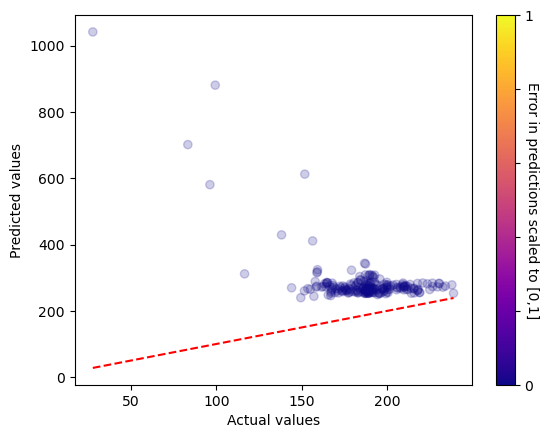

In [351]:
predict_plot(y_val, svr.predict(X_val))

### 2.2 SVM Poly kernel

Degree = 3

In [352]:
from sklearn.svm import SVR
svm_poly_3 = SVR(kernel = "poly", degree = 10, C=10^6, epsilon = 0.1)
svm_poly_3.fit(X_train, y_train)

SVR(C=12, degree=10, kernel='poly')

In [353]:
mean_squared_error(y_val, svm_poly_3.predict(X_val))

945831.5893041723

In [354]:
mean_squared_error(y_train, svm_poly_3.predict(X_train))

541714.7631652423

C:\Users\spect\AppData\Local\Temp\ipykernel_19156\2714923767.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)
C:\Users\spect\AppData\Local\Temp\ipykernel_19156\2714923767.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['0','','','',"",'1'])


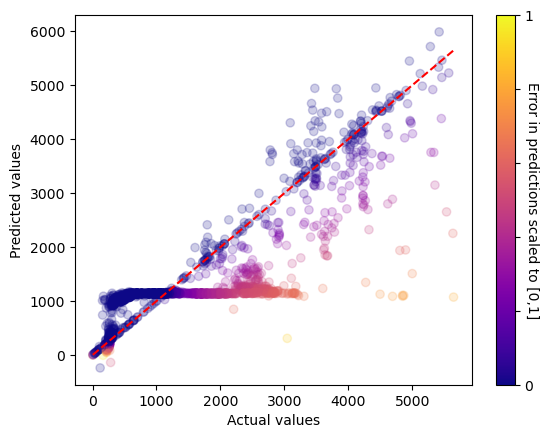

In [355]:
predict_plot(y_train, svm_poly_3.predict(X_train))

## 3. Neural Networks

In [71]:
X_train.shape

(758, 8)

In [72]:
y_train.shape

(758,)

In [37]:
## Trying MLP lyers from scikit-learn

from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor([10000,5000,2000,1000,100,10,1], max_iter = 1000)
mlp_reg.fit(X_train, y_train)

C:\Users\spect\OneDrive\Desktop\ML_conda_projects\spectre_lab\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPRegressor(hidden_layer_sizes=[10000, 5000, 2000, 1000, 100, 10, 1],
             max_iter=1000)

In [39]:
mean_squared_error(y_val, mlp_reg.predict(X_val))

35336.603086981275

In [40]:
mean_squared_error(y_train, mlp_reg.predict(X_train))

KeyboardInterrupt: 

In [76]:
dense_nn = keras.models.Sequential([
    keras.layers.InputLayer(input_shape = X_train.shape[1:]),
    keras.layers.Dense(2000, activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(1500, activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(1000, activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(700, activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(400, activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(200, activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(100, activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(1, activation = "relu")
])
dense_nn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 2000)              18000     
                                                                 
 dense_65 (Dense)            (None, 1500)              3001500   
                                                                 
 dense_66 (Dense)            (None, 1000)              1501000   
                                                                 
 dense_67 (Dense)            (None, 700)               700700    
                                                                 
 dense_68 (Dense)            (None, 400)               280400    
                                                                 
 dense_69 (Dense)            (None, 200)               80200     
                                                                 
 dense_70 (Dense)            (None, 100)              

In [77]:
## Tensorboard utility time function
import os
import time

def tensorboard_dir_gen():
    root_dir = os.path.join(os.curdir, "my_logs")
    curr_time = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    curr_dir = os.path.join(root_dir, curr_time)
    return curr_dir

In [78]:
dense_nn.compile(optimizer = keras.optimizers.SGD(), loss = "mean_squared_error")
# early_stopping = keras.callbacks.EarlyStopping(patience = 50, monitor = "val_loss")
# tensorboard_callback = keras.callbacks.TensorBoard(tensorboard_dir_gen())
history = dense_nn.fit(X_train, y_train, epochs = 50
#                        ,callbacks = [early_stopping, tensorboard_callback]
                      )

Epoch 1/50
24/24 [==============================] - 1s 15ms/step - loss: 204171193509999701655552.0000
Epoch 2/50
24/24 [==============================] - 0s 19ms/step - loss: 296675.7500
Epoch 3/50
24/24 [==============================] - 0s 15ms/step - loss: 296675.7812
Epoch 4/50
24/24 [==============================] - 0s 15ms/step - loss: 296675.7500
Epoch 5/50
24/24 [==============================] - 0s 16ms/step - loss: 296675.7500
Epoch 6/50
24/24 [==============================] - 0s 15ms/step - loss: 296675.7500
Epoch 7/50
24/24 [==============================] - 0s 15ms/step - loss: 296675.7812
Epoch 8/50
24/24 [==============================] - 0s 16ms/step - loss: 296675.7500
Epoch 9/50
24/24 [==============================] - 0s 15ms/step - loss: 296675.7500
Epoch 10/50
24/24 [==============================] - 0s 15ms/step - loss: 296675.7812
Epoch 11/50
24/24 [==============================] - 0s 16ms/step - loss: 296675.7500
Epoch 12/50
24/24 [==========================

In [379]:
X_train

array([[ 0.27079429,  0.39578247, -1.00925478, ..., -0.14665896,
        -0.7770423 ,  0.6411951 ],
       [ 0.27079429, -2.16757159, -0.15234888, ..., -1.40967338,
        -0.63693635,  0.13252811],
       [ 0.27079429, -0.30289548, -0.50561004, ...,  0.24220205,
        -0.56931699,  0.13252811],
       ...,
       [ 0.27079429,  1.54771727, -1.31691491, ...,  0.09833602,
        -0.58333477,  1.14986209],
       [ 0.06002342,  1.72465943, -1.3229508 , ..., -0.42882352,
        -0.47668078,  1.14986209],
       [ 0.27079429, -1.03975745, -0.31456211, ..., -0.60328929,
        -0.75090469,  0.13252811]])

In [370]:
X_val.shape

(210, 8)

## 4. RNN's 

In [79]:
X_train

array([[ 0.26903972, -0.89826773,  0.41537521, ..., -0.55674141,
        -0.18189645, -1.19724647],
       [-0.43664195, -1.84402633,  1.98403524, ...,  0.48036798,
         1.59641776, -1.19724647],
       [ 0.26903972, -1.64550805,  1.64909637, ...,  0.7905657 ,
         0.31658432, -1.19724647],
       ...,
       [ 0.26903972,  0.75129244, -0.99981638, ...,  0.1816398 ,
        -0.67255329,  0.19251283],
       [ 0.26903972,  1.17200014, -1.05668267, ..., -0.08823194,
         1.26432722,  0.19251283],
       [ 0.06523142,  1.49000221, -1.08556253, ..., -1.09633111,
         2.06060776,  0.19251283]])

In [ ]:
rnn_model = keras.models.Sequential([
    keras.layers.
])